In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from utility import *
from unfolding import *
rng = np.random.default_rng()

In [ ]:
recon_table, true_table, weights = read_neutrino_simulations1(flavor='nu_e')

weights = weights * 11 #11 years

true_zenith = np.cos(true_table['zenith'].to_numpy())
recon_zenith = np.cos(recon_table['zenith'].to_numpy())
true_energy = np.log10(true_table['energy'].to_numpy())
recon_energy = np.log10(recon_table['energy'].to_numpy())

In [138]:
RANGE_START = 2.6
RANGE_END = 5
recon_bin_zenith = 4
true_bin_zenith = 4
recon_bin_energy = 28
true_bin_energy = 22
#recon_bin_energy = [2, 2.2, 2.4, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4, 4.15, 4.3, 4.45, 4.6, 4.75, 4.9, 5.05, 5.2, 5.35, 5.5, 5.9, 6.3, 6.7, 7.1, 7.5, 7.9, 8.1]
#true_bin_energy = [2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4, 4.15, 4.3, 4.45, 4.6, 4.75, 4.9, 5.05, 5.2, 5.35, 5.5, 5.9, 6.3, 6.7, 7.1]

recon_bin_zenith_count = len(recon_bin_zenith) - 1 if isinstance(recon_bin_zenith, list) else recon_bin_zenith
true_bin_zenith_count = len(true_bin_zenith) - 1 if isinstance(true_bin_zenith, list) else true_bin_zenith
recon_bin_energy_count = len(recon_bin_energy) - 1 if isinstance(recon_bin_energy, list) else recon_bin_energy
true_bin_energy_count = len(true_bin_energy) - 1 if isinstance(true_bin_energy, list) else true_bin_energy

#trim it up
trimming_cond = (true_energy > RANGE_START) & (true_energy < RANGE_END)
weights = weights[trimming_cond]
true_energy = true_energy[trimming_cond]
recon_energy = recon_energy[trimming_cond]
true_zenith = true_zenith[trimming_cond]
recon_zenith = recon_zenith[trimming_cond]
print(np.max(recon_energy))

6.896206778793331


In [139]:
#x will be energy, y will be zenith
recon_binned, xedges_recon, yedges_recon = np.histogram2d(recon_energy, recon_zenith, bins=(recon_bin_energy, recon_bin_zenith), weights=weights)
true_binned, xedges_true, yedges_true = np.histogram2d(true_energy, true_zenith, bins=(true_bin_energy, true_bin_zenith), weights=weights)

#alpha and acceptance error stuff
trimming_cond2 = (recon_energy > RANGE_START) & (recon_energy < RANGE_END)
weights_trimmed = weights[trimming_cond2]
true_energy_trimmed = true_energy[trimming_cond2]
recon_energy_trimmed = recon_energy[trimming_cond2]
true_zenith_trimmed = true_zenith[trimming_cond2]
recon_zenith_trimmed = recon_zenith[trimming_cond2]
recon_binned_trimmed = np.histogram2d(recon_energy_trimmed, recon_zenith_trimmed, bins=(true_bin_energy, true_bin_zenith), weights=weights_trimmed)[0]

In [140]:
# #compute A Matrix
# #A = np.histogramdd((recon_energy, true_energy, recon_zenith, true_zenith), bins=(recon_bin_energy, true_bin_energy, recon_bin_zenith, true_bin_zenith), weights=weights)[0]
# A = np.histogramdd((recon_energy_trimmed + 10, true_energy_trimmed, recon_zenith_trimmed, true_zenith_trimmed), bins=(true_bin_energy, true_bin_energy, true_bin_zenith, true_bin_zenith), weights=weights_trimmed)[0]
# # Normalize data, it must be the full set of true data, not trimmed down at all
# #true_binned_full = np.histogram2d(true_energy_full, true_zenith_full, bins=(true_bin_energy, true_bin_zenith), weights=weights)[0]
# for i in range(len(A)):
#     for j in range(len(true_binned)):
#         A[i][j] /= true_binned[j] + 1e-12
# #alpha for acceptance error
# alpha = np.sum(np.sum(A, axis=2), axis=0)
# print(alpha.shape)

#writeAMatrix(A, alpha, '/home/colton/school/REU_2025/code/AMatrix_Data_Zelong.h5')
A, alpha = readAMatrix('/home/colton/school/REU_2025/code/AMatrix_Data_Zheyang.h5')
# print(A[:].shape)

In [141]:
#flat_recon_bins = recon_binned.flatten()
#recon_binned_shifted, xedges_recon_shifted, yedges_recon_shifted = np.histogram2d(recon_energy_trimmed + 100, recon_zenith_trimmed, bins=(true_bin_energy, true_bin_zenith), weights=weights_trimmed)
#flat_recon_bins = recon_binned_shifted.flatten()
flat_recon_bins = recon_binned_trimmed.flatten()
#flat_A = A.transpose(0, 2, 1, 3).reshape(recon_bin_energy_count * recon_bin_zenith_count, true_bin_energy_count * true_bin_zenith_count)
flat_A = A.transpose(0, 2, 1, 3).reshape(true_bin_energy_count * true_bin_zenith_count, true_bin_energy_count * true_bin_zenith_count)
flat_alpha = alpha.flatten()
print(flat_alpha)

[0.90943225 0.8728406  0.90170648 0.90697946 0.99761064 0.99864464
 0.99968595 1.         1.00011095 1.         0.9999     1.
 0.99990877 0.99981516 1.00008474 1.         0.9999462  1.00000325
 0.9997917  1.         1.00018803 0.99986868 1.00013405 0.99990411
 1.00000686 1.00013607 1.00010914 0.99991477 1.00013954 0.99988539
 1.00009299 1.00015184 0.99990938 1.00025402 0.99988317 1.00010841
 0.99946218 0.99965898 1.00024233 0.99970119 1.00156731 1.00114323
 1.00009824 1.0001134  1.00000039 0.99989013 0.99995929 1.00002246
 0.99999569 1.00021034 1.00019754 1.00053932 0.99941683 1.
 1.00033218 0.99985439 1.00092834 0.99974546 0.9998437  1.00030067
 1.         1.00033411 0.99967049 0.99994396 1.         1.00014313
 1.00091892 1.00047677 1.         0.99998236 0.99995148 1.
 1.         1.00003129 0.99590667 1.         1.         1.
 1.00488087 1.         1.         0.99963914 1.00007722 0.99988557
 0.92108014 0.90061098 0.87854298 0.91149921]


In [142]:
def cal_llh(hist_1, hist_2):
    return (-2 * (np.sum(hist_1 * np.log(hist_2 + 1e-12) - hist_2) - np.sum(hist_1 * np.log(hist_1 + 1e-12) - hist_1)))

8


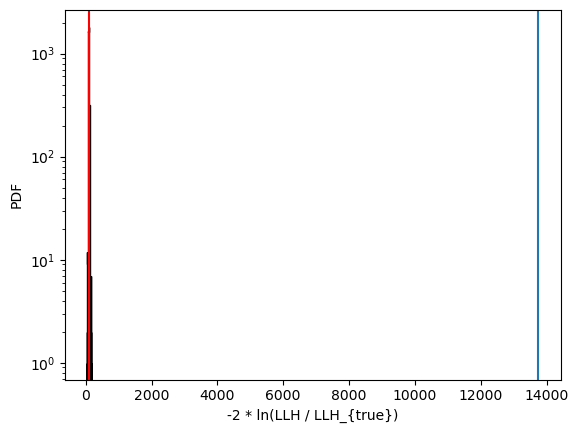

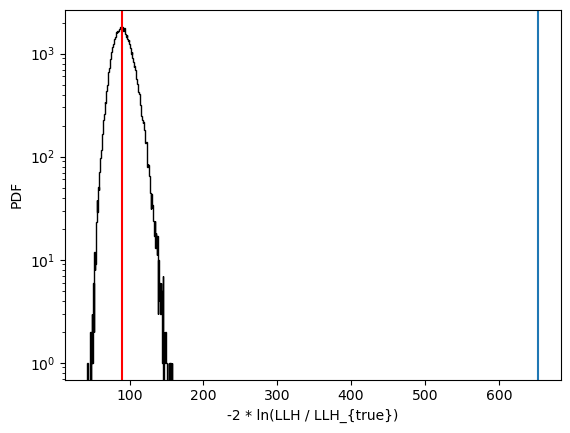

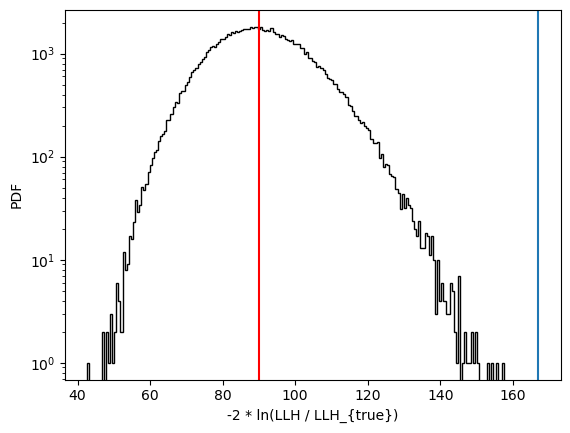

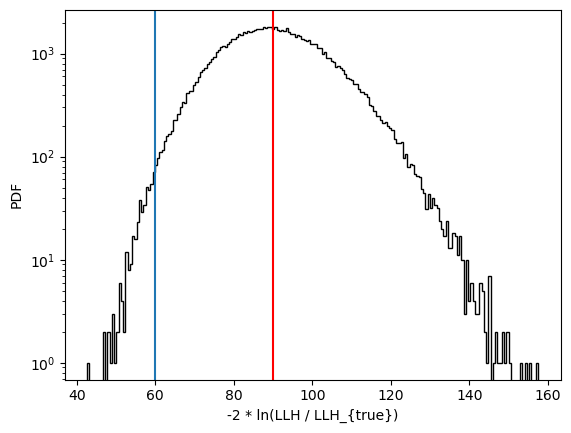

In [143]:
#Implementation of the R-L algorithm
unfolded = np.array([sum(weights) / (true_bin_energy_count * true_bin_zenith_count)] * (true_bin_energy_count * true_bin_zenith_count)) #starting with uniform dist

sampled_recon = [cal_llh(rng.poisson(flat_recon_bins), flat_recon_bins) for _ in range(100000)]
sampled_median = np.median(sampled_recon)
iter_count = 0
N_iter = np.matmul(flat_A, unfolded)
llh = cal_llh(flat_recon_bins, N_iter)

while llh > sampled_median:
    d_k = np.matmul(flat_A, unfolded)
    ratio = flat_recon_bins / (d_k + 1e-12)  # avoid division by zero
    unfolded = unfolded * (flat_A.T @ ratio) / (flat_alpha + 1e-12)

    llh = cal_llh(flat_recon_bins, d_k)
    iter_count += 1
    plt.figure()
    plt.hist(sampled_recon, 200, histtype='step', color = 'black', label = 'Ratio from sample')
    plt.axvline(llh, label = 'Ratio from unfolding')
    plt.axvline(np.median(sampled_recon), color = 'red', label = 'Critcal Value')
    plt.xlabel("-2 * ln(LLH / LLH_{true})")
    plt.ylabel('PDF')
    plt.yscale('log')
    #plt.legend(loc = 'upper right')

for _ in range(iter_count):
    d_k = np.matmul(flat_A, unfolded)
    ratio = flat_recon_bins / (d_k + 1e-12)  # avoid division by zero
    unfolded = unfolded * (flat_A.T @ ratio) / (flat_alpha + 1e-12)

#reshape back to 2D
final_unfolded = unfolded.reshape(true_bin_energy_count, true_bin_zenith_count)
print(iter_count * 2)

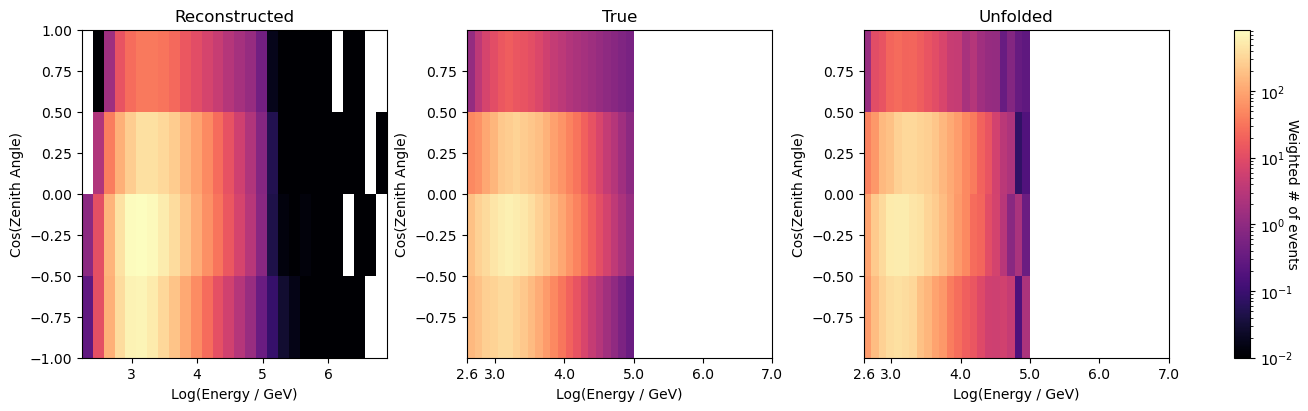

In [144]:
X_recon, Y_recon = np.meshgrid(xedges_recon, yedges_recon)
#X_recon, Y_recon = np.meshgrid(xedges_recon_shifted, yedges_recon_shifted)
X_true, Y_true = np.meshgrid(xedges_true, yedges_true)
tot_min = np.min([np.min(i) for i in (recon_binned, true_binned, final_unfolded)])
tot_max = np.max([np.max(i) for i in (recon_binned, true_binned, final_unfolded)])
fig, ax = plt.subplots(1, 3, layout = 'constrained')
fig.set_figheight(4)
fig.set_figwidth(13)

ax[0].pcolormesh(X_recon, Y_recon, recon_binned.T, cmap = 'magma', norm=LogNorm(vmin=.01, vmax=tot_max))
#ax[0].set_xticks(np.arange(round(min(recon_energy), 0), max(recon_energy), 1))
ax[0].set_title('Reconstructed')
ax[0].set_xlabel('Log(Energy / GeV)')
ax[0].set_ylabel('Cos(Zenith Angle)')
#ax[0].set_xticks([2.6, 3, 4, 5, 6, 7])
# ax[0].set_yticks([-1, .2, .6, 1])

im = ax[1].pcolormesh(X_true, Y_true, true_binned.T, cmap = 'magma', norm=LogNorm(vmin=.01, vmax=tot_max))
ax[1].set_title('True')
ax[1].set_xlabel('Log(Energy / GeV)')
ax[1].set_ylabel('Cos(Zenith Angle)')
ax[1].set_xticks([2.6, 3, 4, 5, 6, 7])
# ax[1].set_yticks([-1, .2, .6, 1])

ax[2].pcolormesh(X_true, Y_true, final_unfolded.T, cmap = 'magma', norm=LogNorm(vmin=.01, vmax=tot_max))
ax[2].set_title('Unfolded')
ax[2].set_xlabel('Log(Energy / GeV)')
ax[2].set_ylabel('Cos(Zenith Angle)')
ax[2].set_xticks([2.6, 3, 4, 5, 6, 7])
# ax[2].set_yticks([-1, .2, .6, 1])

cbar = fig.colorbar(im, ax=ax, shrink = 1)
cbar.set_label('Weighted # of events', rotation=270)

In [145]:
print(np.sum(np.power(true_binned - final_unfolded, 2) / true_binned)) #49.856478
print(22 * 4)

475.91316960893255
88


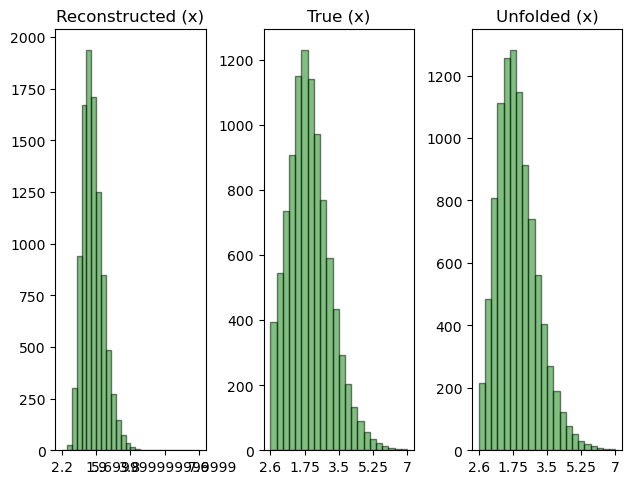

In [146]:
create_graphs1D([np.sum(recon_binned, axis=1), np.sum(true_binned, axis=1), np.sum(final_unfolded, axis=1)], ['Reconstructed (x)', 'True (x)', 'Unfolded (x)'], [[2.2, 7.6], [2.6, 7], [2.6, 7]], color = 'green')

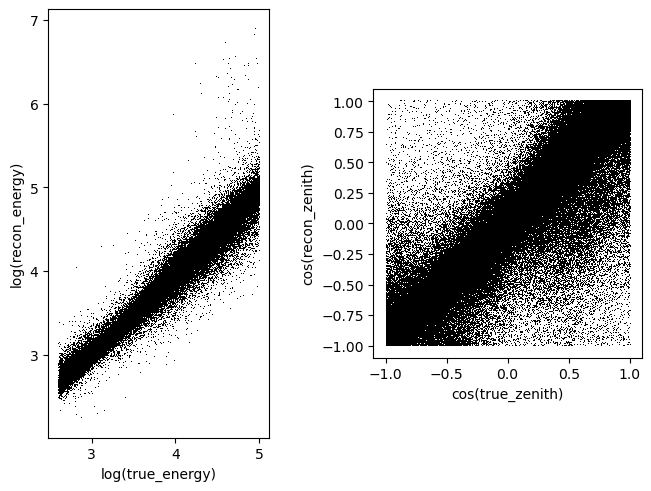

In [147]:
fig, ax = plt.subplots(1, 2, layout = 'constrained')
ax[0].set(adjustable='box', aspect='equal')
ax[0].plot(true_energy, recon_energy, 'k,')
ax[0].set_xlabel('log(true_energy)')
ax[0].set_ylabel('log(recon_energy)')
ax[1].set(adjustable='box', aspect='equal')
ax[1].plot(true_zenith, recon_zenith, 'k,')
ax[1].set_xlabel('cos(true_zenith)')
ax[1].set_ylabel('cos(recon_zenith)')
plt.show()

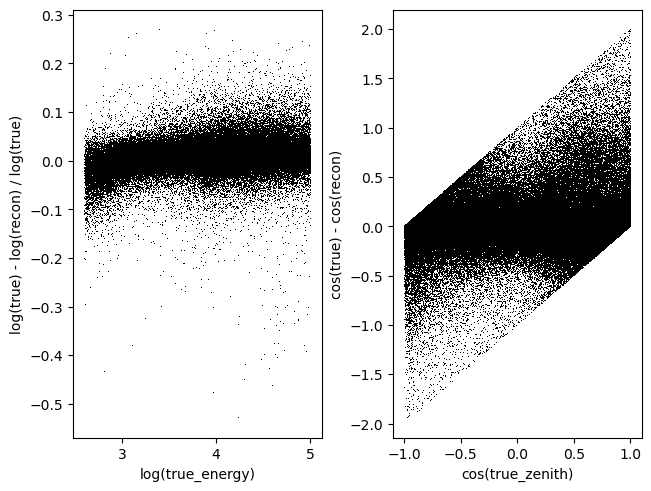

In [148]:
energy_resolution = (true_energy - recon_energy) / true_energy
zenith_resolution = true_zenith - recon_zenith 
fig, ax1 = plt.subplots(1, 2, layout = 'constrained')
#ax1[0].set(adjustable='box', aspect='equal')
ax1[0].plot(true_energy, energy_resolution, 'k,')
ax1[0].set_xlabel('log(true_energy)')
ax1[0].set_ylabel('log(true) - log(recon) / log(true)')
#ax1[1].set(adjustable='box', aspect='equal')
ax1[1].plot(true_zenith, zenith_resolution, 'k,')
ax1[1].set_xlabel('cos(true_zenith)')
ax1[1].set_ylabel('cos(true) - cos(recon)')
plt.show()